In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [152]:
# Get a list of all CSV files in the data directory
csv_files = glob.glob('../data/results_*.csv')

# Read all CSV files into a list of dataframes

dataframes = []
for file in csv_files:
    df_results_year = pd.read_csv(file)
    year = file.split('/')[-1].split('.')[0].split('_')[1]
    df_results_year['year'] = year
    dataframes.append(df_results_year)


df_results = pd.concat(objs=dataframes)
df_results['athlete_id'] = df_results['athlete_id'].astype(int)
df_results['position'] = pd.to_numeric(df_results['position'], errors='coerce')

# df_results.set_index(['athlete_id','year','sport','event'], inplace=True)

print(df_results.dtypes)
df_results

athlete_id      int64
season         object
sport          object
event          object
position      float64
medal          object
country        object
team           object
year           object
dtype: object


,athlete_id,season,sport,event,position,medal,country,team,year
0,13139,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN,2006
1,13139,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN,2006
2,13139,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada,2006
3,65547,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil,2006
4,71212,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary,2006
...,...,...,...,...,...,...,...,...,...
13741,136663,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Somalia,NaN,2016
13742,136664,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Eritrea,NaN,2016
13743,140789,Summer,Hockey,"Hockey, Men",NaN,NaN,Australia,Australia,2016
13744,141524,Summer,Hockey,"Hockey, Men",NaN,NaN,Canada,Canada,2016


In [149]:
df_metadata = pd.read_excel('../data/metadata.xlsx')
df_metadata.set_index('athlete_id', inplace=True)
df_metadata

,name,sex,measurements,born,died,affiliations
athlete_id,,,,,,
7,Patrick•Chila,Male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...
15,Damien•Éloi,Male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA..."
27,Christophe•Legoût,Male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ..."
132,Elke•Schall-Wosik,Female,180 cm / 68 kg,1973-07-19,NaN,TSG Dülmen / Bayer Uerdingen / SV Winterwerb /...
179,Kallinikos•Kreangka,Male,169 cm / 62 kg,1972-03-08,NaN,"Finower TTC, GER / TTF Liebherr Ochsenhausen E..."
...,...,...,...,...,...,...
138428,Arielle•Gold,Female,165 cm / 64 kg,1996-05-04,NaN,Insight School of Colorado
138429,Liu•Jinli,Female,170 cm / 65 kg,1989-03-16,NaN,"Harbin Curling Club, Harbin (CHN) / ?, Heilong..."
140789,Tom•Craig,Male,186 cm / 85 kg,1995-09-03,NaN,"NSW Pride, Sydney (AUS)"


In [153]:
df = pd.merge(left=df_results, right=df_metadata, how='left', left_on='athlete_id', right_index=True)
df

,athlete_id,season,sport,event,position,medal,country,team,year,name,sex,measurements,born,died,affiliations
0,13139,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN,2006,Clara•Hughes,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
1,13139,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN,2006,Clara•Hughes,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
2,13139,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada,2006,Clara•Hughes,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
3,65547,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil,2006,Claudinei•da Silva,Male,186 cm / 88 kg,1970-11-19,NaN,Funilense/Reebok
4,71212,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary,2006,Zsolt•Kürtösi,Male,188 cm / 88 kg,1971-03-21,NaN,"TFSE, Budapest (HUN) / Pécsi VSK, Pécs (HUN)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13741,136663,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Somalia,NaN,2016,Mohamed•Mohamed,Male,NaN,1996-03-01,NaN,NaN
13742,136664,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Eritrea,NaN,2016,Aron•Kifle,Male,NaN,1998-02-20,NaN,NaN
13743,140789,Summer,Hockey,"Hockey, Men",NaN,NaN,Australia,Australia,2016,Tom•Craig,Male,186 cm / 85 kg,1995-09-03,NaN,"NSW Pride, Sydney (AUS)"
13744,141524,Summer,Hockey,"Hockey, Men",NaN,NaN,Canada,Canada,2016,Antoni•Kindler,Male,NaN,1988-05-16,NaN,"West Vancouver FHC, West Vancouver (CAN)"


# Excercices

## Exercise 1

- Combine all provided data adequately into a single, tidy data set (e.g. by merging, concatenating
or reshaping the data) such that you are able to answer the subsequent questions.

- Explain your steps in a few sentences. How do you combine the data? What are the main
challenges? How do you deal with them and why in this way?

- Sort the data permanently by year, sport, event and position. Then display the first 3 rows and
the last 3 rows of the data set and print the number of rows and columns

In [85]:
df.sort_values(['year','sport','event','position'], inplace=True)

display(df.head(3))
display(df.tail(3))
print(f"number of rows {df.shape[0]}")
print(f"number of columns {df.shape[1]}")

,athlete_id,season,sport,event,position,medal,country,team,year,name,sex,measurements,born,died,affiliations
3231,110095,Winter,Alpine Skiing,"Combined, Men",1.0,Gold,United States,NaN,2006,Ted•Ligety,Male,180 cm / 86 kg,1984-08-31,NaN,"Park City Ski Team, Park City (USA)"
1862,101791,Winter,Alpine Skiing,"Combined, Men",2.0,Silver,Croatia,NaN,2006,Ivica•Kostelić,Male,182 cm / 88 kg,1979-11-23,NaN,"SK Zagreb, Zagreb (CRO)"
1837,101752,Winter,Alpine Skiing,"Combined, Men",3.0,Bronze,Austria,NaN,2006,Rainer•Schönfelder,Male,176 cm / 88 kg,1977-06-13,NaN,"SC Petzen, Bleiburg (AUT)"


,athlete_id,season,sport,event,position,medal,country,team,year,name,sex,measurements,born,died,affiliations
1940,117165,Summer,Wrestling,"Welterweight, Greco-Roman, Men",16.0,NaN,Hungary,NaN,2016,Tamás•Lőrincz,Male,172 cm / 75 kg,1986-12-20,NaN,Ceglédi VSE
11822,134915,Summer,Wrestling,"Welterweight, Greco-Roman, Men",17.0,NaN,Kyrgyzstan,NaN,2016,Ruslan•Tsarev,Male,170 cm / 66 kg,1991-07-16,NaN,"Berkut [Bishkek, KGZ]"
10420,133610,Summer,Wrestling,"Welterweight, Greco-Roman, Men",18.0,NaN,Egypt,NaN,2016,Adham•Saleh,Male,160 cm / 66 kg,1993-06-27,NaN,NaN


number of rows 54276
number of columns 15


## Exercise 2


- Which woman won the Gold medal in the 100 meters race of the 2012 olympic games?

- Which athlete has won the most gold medals, considering only athletes from the following countries:
“Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”?

- What was the best position, worst position, and average position achieved by athletes from “Nepal”?
(Hint: you can ignore missing values in the position column)

- Which woman won the Gold medal in the 100 meters race of the 2012 olympic games?

In [109]:
df[(df.year=='2012') & (df.sport=='Athletics') &  (df.event=='100 metres, Women') & (df.medal=='Gold')][['name', 'medal','event']]

,name,medal,event
3454,Shelly-Ann•Fraser-Pryce,Gold,"100 metres, Women"


- Which athlete has won the most gold medals, considering only athletes from the following countries:
“Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”?

In [134]:
country_list = ["Jamaica", "Trinidad and Tobago", "Barbados", "Grenada", "Saint Kitts and Nevis"]
athlete_id_most_medals = df[(df.medal=='Gold') & (df.country.isin(country_list))].value_counts('athlete_id').nlargest(1).index[0]
athlete_id_most_medals
df[df.athlete_id==athlete_id_most_medals].name.iloc[0]

'Usain•Bolt'

- What was the best position, worst position, and average position achieved by athletes from “Nepal”?

In [164]:
df_nepal = df[(df.country=='Nepal')]

print(f"The best position for Nepal's athelets was {df_nepal.position.min(numeric_only=True)}")
print(f"The worst position for Nepal's athelets was {df_nepal.position.max(numeric_only=True)}")
print(f"The average position for Nepal's athelets was {df_nepal.position.mean(numeric_only=True)}")

The best position for Nepal's athelets was 7.0
The worst position for Nepal's athelets was 94.0
The average position for Nepal's athelets was 47.77777777777778


## Exercise 3

- Visualize how the number of participants has changed over the years. Create a single figure with one
subplot for the summer games and one subplot for the winter games.

Note: If a single athlete participates at multiple events at a given olympic game, then count this athlete
only once. For instance, Usain Bolt partcipated at three events (100 meters, 200 meters, and 4x100
meters relay) in the 2016 olympic games. He should be counted only as one participant, not as three
participants.

Setting both graphs to have the same y-axis limits makes no sense, as we were told to separate the data by season in the two diferent graphs.


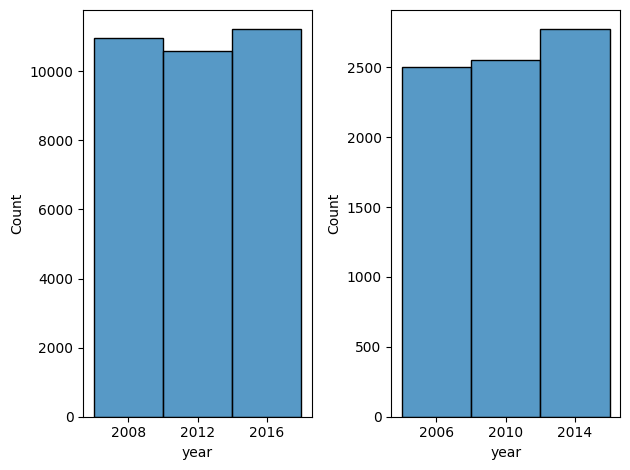

In [200]:
fig, ax = plt.subplots(ncols=2,nrows=1)

df_once = df[['year','athlete_id','season','name']].drop_duplicates()

sns.histplot(data=df_once[(df_once.season=="Summer")],x='year',ax=ax[0])
sns.histplot(data=df_once[(df_once.season=="Winter")],x='year',ax=ax[1])

fig.tight_layout()

print("Setting both graphs to have the same y-axis limits makes no sense, as we were told to separate the data by season in the two diferent graphs.") 

## Exercise 4


## Exercise 5

## Exercise 6